In [147]:
# import data
import pandas as pd
# chronic heart disease (chd)
df = pd.read_csv('http://statweb.stanford.edu/~tibs/ElemStatLearn/datasets/SAheart.data', index_col=0)# copy data and separate predictors and response
df.head()
# sbp: systolic blood pressure
# tobacco: cumulative tobacco (kg)
# ldl: low density lipoprotein cholesterol
# adiposity
# famhist: family history of heart disease (Present, Absent)
# typea: type-A behavior (workaholics)
# obesity
# alcohol: current alcohol consumption
# age: age at onset
# chd (response): coronary heart disease


,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
row.names,,,,,,,,,,
1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


<AxesSubplot:xlabel='tobacco', ylabel='chd'>

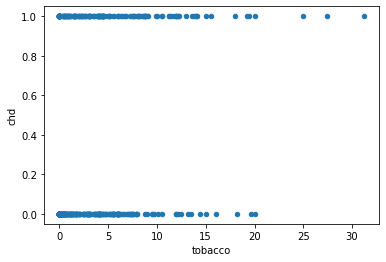

In [151]:
# Examine the data
df.plot.scatter('tobacco', 'chd')

In [161]:
# Build binary logistic model using one predicting variable
import statsmodels.api as sm

Xtrain = df[['tobacco']]
Xtrain = sm.add_constant(Xtrain)
ytrain = df['chd']

log_reg = sm.Logit(ytrain, Xtrain).fit()
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.600268
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                    chd   No. Observations:                  462
Model:                          Logit   Df Residuals:                      460
Method:                           MLE   Df Model:                            1
Date:                Fri, 16 Jul 2021   Pseudo R-squ.:                 0.06955
Time:                        17:56:16   Log-Likelihood:                -277.32
converged:                       True   LL-Null:                       -298.05
Covariance Type:            nonrobust   LLR p-value:                 1.202e-10
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.1894      0.139     -8.557      0.000      -1.462      -0.917
tobacco        0.1453      0.

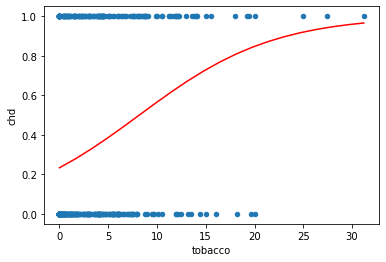

In [162]:
# Plot the logistic model
import numpy as np
import matplotlib.pyplot as plt
tmp, value_min = Xtrain.min()
tmp, value_max = Xtrain.max()
pred_input = np.linspace(value_min, value_max, 20)
pred_input = sm.add_constant(pred_input)
predictions = log_reg.predict(pred_input)

df.plot.scatter('tobacco', 'chd')
plt.plot(pred_input[:,1],predictions,c='red')
plt.show()

In [163]:
# Accuracy analysis
from sklearn.metrics import (confusion_matrix, accuracy_score,f1_score,precision_score,recall_score)

predictions = log_reg.predict(Xtrain)
predictions = list(map(round, predictions))

# confusion matrix
cm = confusion_matrix(ytrain, predictions) 
print ("Confusion Matrix : \n", cm) 
  
# accuracy score of the model
print('Test accuracy = ', accuracy_score(ytrain, predictions))
print('recall_score (sensitivity) = ', recall_score(ytrain, predictions)) # sensitivity
print('precision_score (specificity) = ', precision_score(ytrain, predictions)) # specificity

Confusion Matrix : 
 [[283  19]
 [119  41]]
Test accuracy =  0.7012987012987013
recall_score (sensitivity) =  0.25625
precision_score (specificity) =  0.6833333333333333


In [164]:
# Multiple predicting variables
Xtrain = df[['sbp', 'tobacco','ldl','adiposity', 'typea','obesity', 'alcohol','age']]
Xtrain = sm.add_constant(Xtrain)
ytrain = df['chd']

# building the model and fitting the data
log_reg = sm.Logit(ytrain, Xtrain).fit()
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.529096
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                    chd   No. Observations:                  462
Model:                          Logit   Df Residuals:                      453
Method:                           MLE   Df Model:                            8
Date:                Fri, 16 Jul 2021   Pseudo R-squ.:                  0.1799
Time:                        17:56:54   Log-Likelihood:                -244.44
converged:                       True   LL-Null:                       -298.05
Covariance Type:            nonrobust   LLR p-value:                 1.415e-19
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.0669      1.272     -4.771      0.000      -8.559      -3.575
sbp            0.0056      0.

In [165]:
# Accuracy analysis
from sklearn.metrics import (confusion_matrix, accuracy_score,f1_score,precision_score,recall_score)

predictions = log_reg.predict(Xtrain)
predictions = list(map(round, predictions))

# confusion matrix
cm = confusion_matrix(ytrain, predictions) 
print ("Confusion Matrix : \n", cm) 
  
# accuracy score of the model
print('Test accuracy = ', accuracy_score(ytrain, predictions))
print('recall_score (sensitivity) = ', recall_score(ytrain, predictions)) # sensitivity
print('precision_score (specificity) = ', precision_score(ytrain, predictions)) # specificity

Confusion Matrix : 
 [[253  49]
 [ 79  81]]
Test accuracy =  0.7229437229437229
recall_score (sensitivity) =  0.50625
precision_score (specificity) =  0.6230769230769231
